In [3]:
import sys
sys.path.insert(0, "/home/emmanuel/projects/2019_sakame")

# Standard Python Libraries
import numpy as np

# Data functions
from dataclasses import dataclass
from src.data.make_dataset import get_class_data

# ML Model Functions
from src.models.classification import svm_naive
from src.models.derivatives import SVMDerivative

# Visualization Functions
from src.visualization.utils import create_grid
from src.visualization.classification import plot_toy_data, plot_predictions, plot_sensitivity

%load_ext autoreload
%autoreload 2

### Experiment Params

In [4]:
@dataclass
class DemoParams:
    dataset = 'circles'
    num_points = 200
    num_training = .5
    noise_level = 0.01
    plots = "demo"
    random_state = None
    n_jobs = -1
    verbose = 1
    mask_param = 1.0
    grid_points = 100

### Data

In [5]:
Xdata, ydata = get_class_data(
    num_points=DemoParams.num_points,          
    num_training=DemoParams.num_training,                          
    noise=DemoParams.noise_level,                                        
    random_state=DemoParams.random_state,                                        
    data_set=DemoParams.dataset
)

### Visualize Toy Data

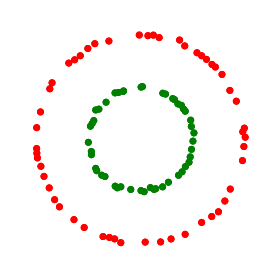

In [6]:
import matplotlib.pyplot as plt

# plot data
fig, ax = plot_toy_data(
    Xdata['train'],
    ydata['train'],
    Xdata['data']
)

plt.tight_layout()
plt.show()

## 1.0 Model (SVM Classifier)

### 1.1 - Train SVM Model

We will train an svm model that has been cross-validated to find the best parameters for the model.

In [7]:
svm_model = svm_naive(
    X_train=Xdata['train'],
    y_train=ydata['train'],
    n_grid=30,
    cv=5
)

In [8]:
svm_model

SVC(C=0.6993103448275861, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.6993103448275861, kernel='rbf', max_iter=-1, probability=False,
    random_state=123, shrinking=True, tol=0.001, verbose=False)

### 1.2 - Visualize Predictions

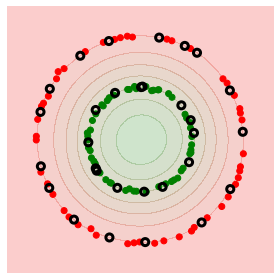

In [9]:
fig, ax = plot_predictions(
    xgrid=Xdata['data'],
    decision_function=svm_model.decision_function,
    support_vectors=svm_model.support_vectors_,
#     xtrain=Xdata['train'],
#     ytrain=ydata['train'],
    xtest=Xdata['test'],
    ytest=ydata['test']
)


plt.tight_layout()
plt.show()

## 2.0 - Sensitivity

We need to extract the support vectors and labels which we will need to calculate the derivative.

### 2.1 - Derivative

In [10]:
SVMDerivative?

Init signature:
SVMDerivative(
    svm_model: sklearn.base.BaseEstimator,
    mask_param: float = 1.0,
)
Docstring:     
A class to take the derivatives of different functions for
the SVM classifier with a tanh() function and RBF kernel.

Parameters
----------
svm_model : BaseEstimator
    a trained svm model from the sklearn library

mask_param : float, default=1.0
    a parameter to determine the smoothness of the tanh function.

Attributes
----------
weights : np.ndarray, (N x 1)
    the weights (alpha value) for the trained svm model

bias : float
    the bias (b) parameter for the trained svm model

support_vectors : np.ndarray, (N x 1)
    the support vectors (training points) for the svm model

gamma : float
    the gamma parameter for the RBF kernel of the svm model

y_labels : np.ndarray, (N x 1)
    the y values for the svm model

Example
-------
>> svm_der = SVMDerivative(svm_model, 1.0)
>> x_ders = svm_derivative.full_derivative(X)
File:           ~/projects/2019_sakame/src

#### 2.1.1 - Decision Function

In [11]:
# initialize derivative calculator
svm_derivative = SVMDerivative(svm_model, 1.0)

# calculate derivative of decision function
x_plot = create_grid(Xdata['data'], 100)

x_ders = svm_derivative.decision_derivative(x_plot)

assert x_ders.shape[0] == x_plot.shape[0]

sens = (x_ders**2).sum(axis=1)
x_ders.shape

(10000, 1)

##### Plot Sensitivity

In [14]:
x_plot.shape

(10000, 2)

In [ ]:
fig, ax = plot_sensitivity(
    xgrid=x_plot,
    sensitivity=sens,
    support_vectors=svm_model.support_vectors_
)

plt.tight_layout()
plt.show()

#### 2.2 - Objective Function

In [ ]:
# initialize derivative calculator
svm_derivative = SVMDerivative(svm_model, 1.0)

# calculate derivative of decision function
x_plot = create_grid(Xdata['data'], 100)

x_ders = svm_derivative.objective_derivative(x_plot)

assert x_ders.shape[0] == x_plot.shape[0]

sens = (x_ders**2).sum(axis=1)
x_ders.shape

##### Plot Sensitivity

In [ ]:
fig, ax = plot_sensitivity(
    xgrid=x_plot,
    sensitivity=sens,
    support_vectors=svm_model.support_vectors_
)

plt.tight_layout()
plt.show()

#### 2.3 - Mask Function

In [16]:
# initialize derivative calculator
svm_derivative = SVMDerivative(svm_model, 1.0)

# calculate derivative of decision function
x_plot = create_grid(Xdata['data'], 100)

x_ders = svm_derivative.mask_derivative(x_plot)

assert x_ders.shape[0] == x_plot.shape[0]

sens = (x_ders**2).sum(axis=1)
x_ders.shape

(10000, 1)

##### Plot Sensitivity

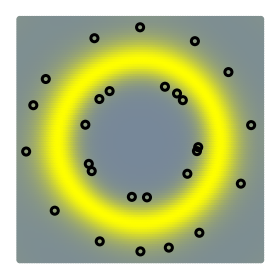

In [17]:
fig, ax = plot_sensitivity(
    xgrid=x_plot,
    sensitivity=sens,
    support_vectors=svm_model.support_vectors_
)

plt.tight_layout()
plt.show()

#### 2.4 - Kernel Function

In [18]:
# initialize derivative calculator
svm_derivative = SVMDerivative(svm_model, 1.0)

# calculate derivative of decision function
x_plot = create_grid(Xdata['data'], 100)

x_ders = svm_derivative.kernel_derivative(x_plot)

assert x_ders.shape[0] == x_plot.shape[0]

sens = (x_ders**2).sum(axis=1)
x_ders.shape

(10000, 2)

##### Plot Sensitivity

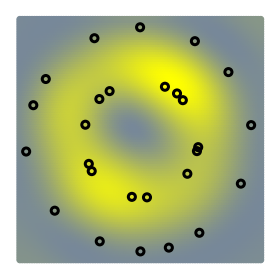

In [19]:
fig, ax = plot_sensitivity(
    xgrid=x_plot,
    sensitivity=sens,
    support_vectors=svm_model.support_vectors_
)

plt.tight_layout()
plt.show()

#### 2.5 - Full Derivative

In [20]:
# initialize derivative calculator
svm_derivative = SVMDerivative(svm_model, 1.0)

# calculate derivative of decision function
x_plot = create_grid(Xdata['data'], 100)

x_ders = svm_derivative.full_derivative(x_plot)

assert x_ders.shape[0] == x_plot.shape[0]

sens = (x_ders**2).sum(axis=1)
x_ders.shape

(10000, 2)

##### Plot Sensitivity

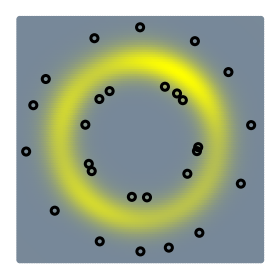

In [21]:
fig, ax = plot_sensitivity(
    xgrid=x_plot,
    sensitivity=sens,
    support_vectors=svm_model.support_vectors_
)

plt.tight_layout()
plt.show()